# Social Network Ads Result Analysis

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.shape

(400, 3)

In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


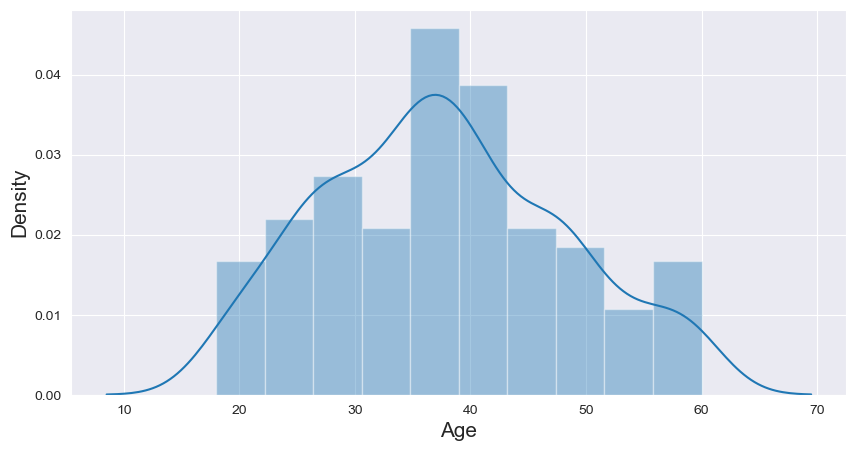

In [7]:
#distribution plot
plt.figure(figsize=(10, 5))
sns.distplot(df['Age'])
plt.xlabel('Age', fontsize=15)
plt.ylabel('Density', fontsize=15);

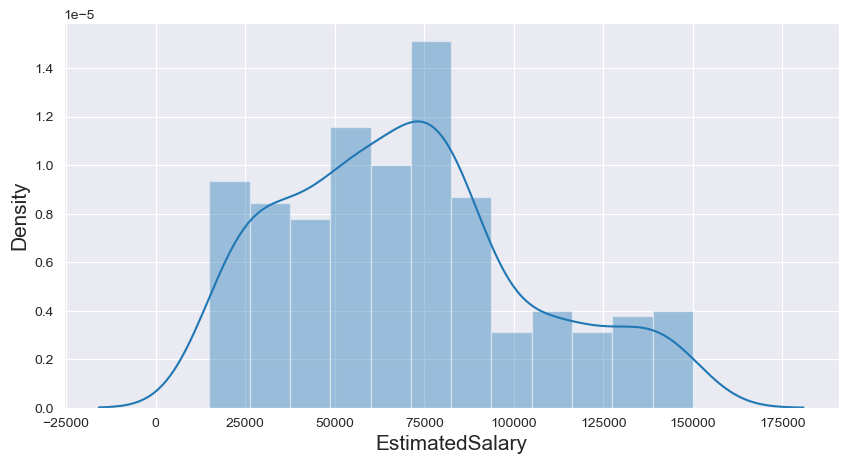

In [8]:
''' distribution plot of EstimatedSalary '''
plt.figure(figsize=(10, 5))
sns.distplot(df['EstimatedSalary'])
plt.xlabel('EstimatedSalary', fontsize=15)
plt.ylabel('Density', fontsize=15);

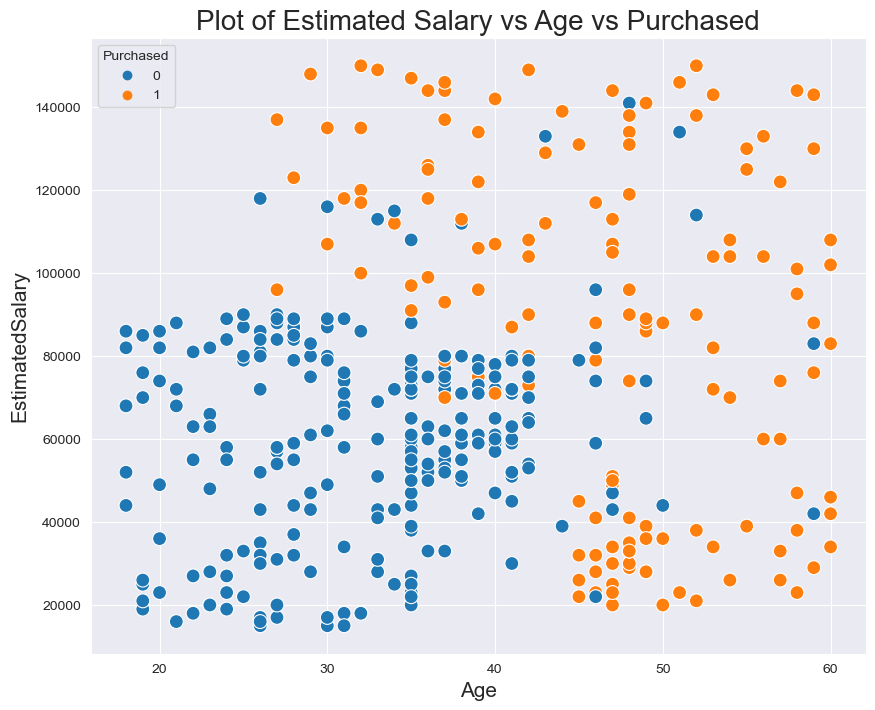

In [9]:
#scatter plot
plt.figure(figsize=(10,8))
plt.title('Plot of Estimated Salary vs Age vs Purchased', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('EstimatedSalary', fontsize=15)
sns.scatterplot(data=df,x='Age',y= 'EstimatedSalary', hue='Purchased', s=100);

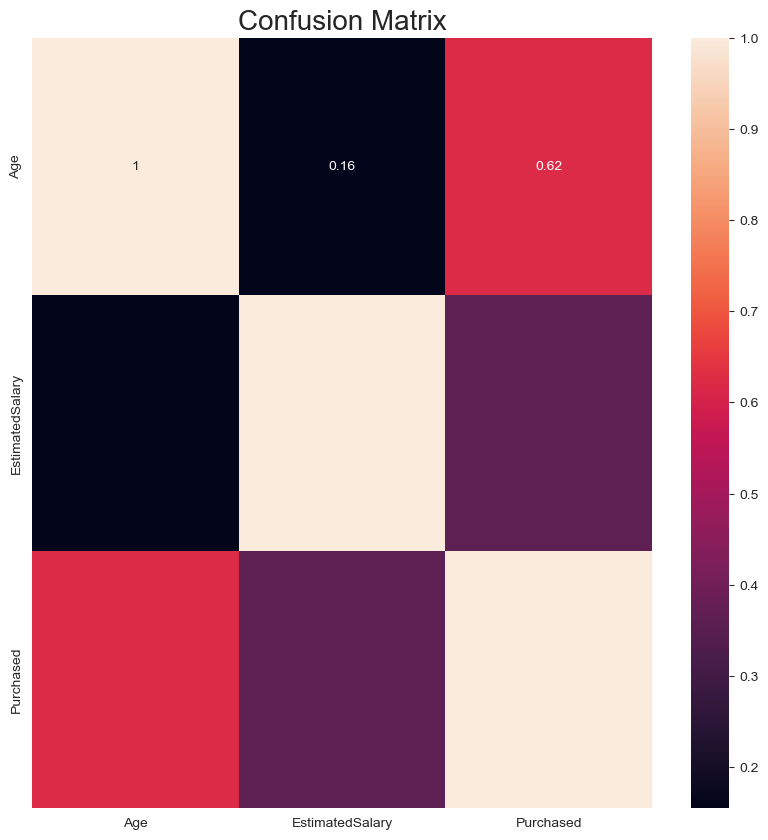

In [10]:
''' correlation matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Confusion Matrix', fontsize=20);

In [11]:
#independent and dependent variables
X = df.drop('Purchased',axis=1)
y = df.Purchased

In [12]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
def scores(m, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    ms = {}
    
    for n, model in m.items():
        model.fit(X_train,y_train)
        ms[n] = model.score(X_test,y_test)

    ms = pd.DataFrame(ms, index=['Score']).transpose()
    ms = ms.sort_values('Score')
        
    return ms

In [17]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'RandomForestClassifier': RandomForestClassifier(),
          }

In [18]:
results  = scores(models, X_train, X_test, y_train, y_test)

In [19]:
results

,Score
LogisticRegression,0.8625
RandomForestClassifier,0.8875


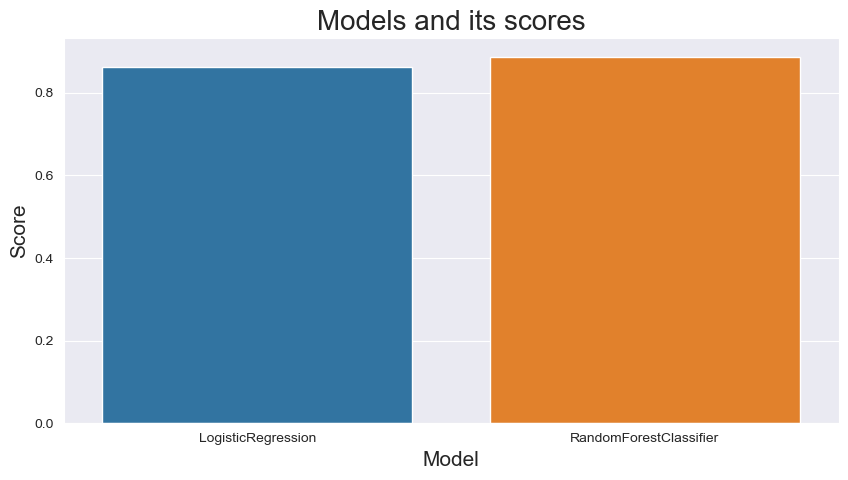

In [20]:
''' barplot of results '''
plt.figure(figsize=(10, 5))
# plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title("Models and its scores", fontsize=20)
sns.barplot(x=results.index, y=results.Score.values,);


In [21]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

lr_preds = lr.predict(X_test)

In [22]:
print("Classification Report: \n", classification_report(y_test, lr_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



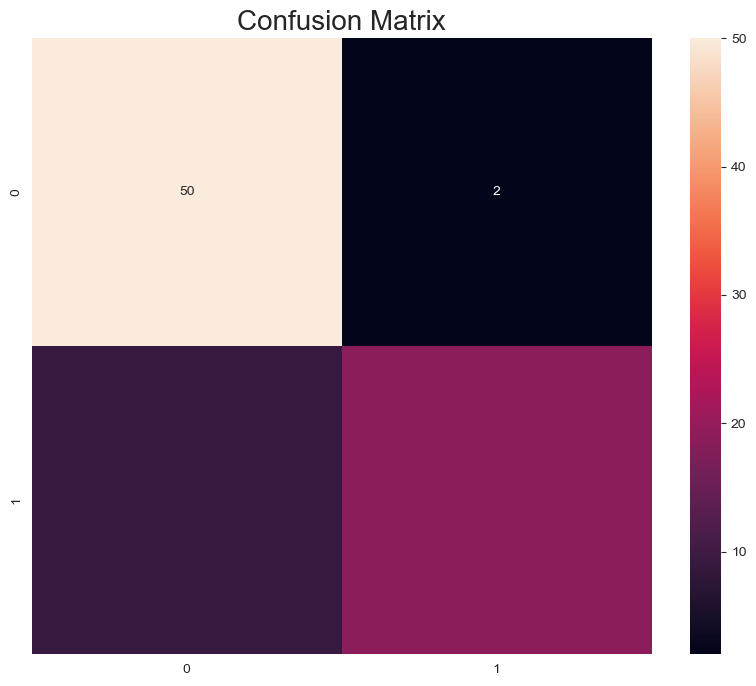

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True)
plt.title('Confusion Matrix', fontsize=20);

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

rf_preds = rf.predict(X_test)

In [25]:
print("Classification Report: \n", classification_report(y_test, rf_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.80      0.86      0.83        28

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



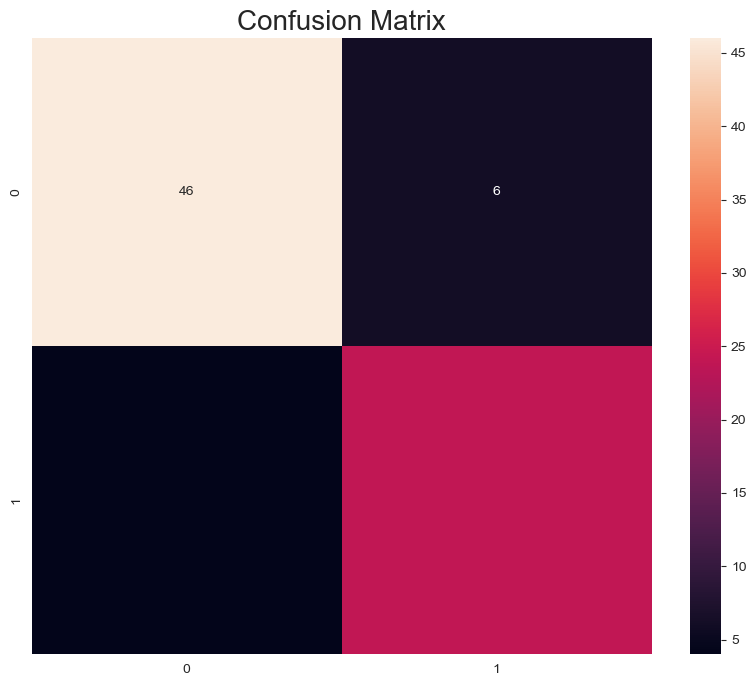

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True)
plt.title('Confusion Matrix', fontsize=20);